# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 14

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,49,11.964286,67,54.798058,5.6,4.580136,6.014256,4.450042,2.069095
96,Pope,Burnley,54,12.000000,66,57.644916,5.5,4.803743,5.724269,4.639971,2.067202
597,Sánchez,Brighton,44,3.000000,12,12.383133,4.0,4.127711,5.496281,4.029756,1.967809
325,Darlow,Newcastle Utd,50,13.157895,50,55.384342,3.8,4.209210,3.855175,4.062859,1.882416
431,Fabianski,West Ham,51,14.090909,62,59.800176,4.4,4.243883,3.074491,4.531011,1.879223
383,Lloris,Tottenham,56,14.000000,63,61.115723,4.5,4.365409,4.888329,4.335906,1.844722
363,McCarthy,Southampton,46,14.000000,56,52.627633,4.0,3.759117,3.750491,3.498951,1.752697
417,Johnstone,West Brom,45,13.888889,50,50.550202,3.6,3.639615,3.840729,3.513034,1.715731
217,Schmeichel,Leicester City,55,14.146341,58,54.211979,4.1,3.832226,3.885737,3.877817,1.634067


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
277,Cancelo,Manchester City,55,9.019608,46,43.926742,5.1,4.870139,4.813500,4.803531,2.076634
273,Stones,Manchester City,49,5.000000,30,22.785006,6.0,4.557001,5.488500,4.531484,2.058643
123,James,Chelsea,53,12.000000,54,54.537063,4.5,4.544755,4.862174,4.343971,1.974116
470,Kilman,Wolves,42,8.095238,34,32.617427,4.2,4.029212,1.446260,4.053103,1.966054
232,Chilwell,Chelsea,62,11.000000,66,53.303918,6.0,4.845811,4.406430,4.635652,1.946124
165,Holgate,Everton,48,5.000000,24,20.968696,4.8,4.193739,4.990694,4.102250,1.914171
558,Coufal,West Ham,46,10.975610,45,43.757581,4.1,3.986802,3.675776,4.303404,1.858856
461,Saïss,Wolves,51,8.958333,43,36.139706,4.8,4.034200,3.371377,4.062133,1.786374
155,Digne,Everton,60,8.095238,34,35.330028,4.2,4.364298,NaN,4.290974,1.781717


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
105,Jorginho,Chelsea,48,8.000000,40,37.357525,5.0,4.669691,2.606531,4.422108,2.131412
37,Grealish,Aston Villa,78,11.944444,86,70.465437,7.2,5.899432,5.754968,5.702501,2.112335
141,Zaha,Crystal Palace,75,12.000000,78,66.918808,6.5,5.576567,4.911460,5.392197,2.036274
272,De Bruyne,Manchester City,118,12.037037,65,83.025269,5.4,6.897484,9.007967,6.576007,2.007935
302,Fernandes,Manchester Utd,110,13.076923,102,87.041583,7.8,6.656121,6.842947,6.461122,2.006896
254,Salah,Liverpool,125,12.967033,118,91.945624,9.1,7.090722,6.620020,7.641299,2.005559
40,Trézéguet,Aston Villa,52,8.928571,25,40.150208,2.8,4.496823,7.006531,4.323846,1.971987
390,Son,Tottenham,97,13.975904,116,85.832372,8.3,6.141454,5.342371,6.439866,1.971902
45,El Ghazi,Aston Villa,57,6.041667,29,27.434407,4.8,4.540867,6.426633,4.355064,1.901960


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,66,12.058824,82,72.191236,6.8,5.986590,5.674135,5.876212,2.330277
202,Bamford,Leeds United,64,14.067797,83,81.808427,5.9,5.815298,5.635695,5.869149,2.298698
224,Vardy,Leicester City,102,12.948718,101,90.556854,7.8,6.993500,6.729976,6.827750,2.189750
388,Kane,Tottenham,110,14.050633,111,96.068090,7.9,6.837278,4.804594,7.201208,2.061517
514,Watkins,Aston Villa,61,12.000000,54,58.542809,4.5,4.878567,3.850000,4.703207,1.975274
377,Adams,Southampton,60,13.958333,67,65.914045,4.8,4.722200,3.961284,4.911727,1.927830
164,Calvert-Lewin,Everton,79,13.939394,92,74.311236,6.6,5.331023,4.157542,5.182902,1.896693
68,Maupay,Brighton,61,11.891892,44,51.962809,3.7,4.369600,2.600000,4.358700,1.769199
588,Welbeck,Brighton,55,8.095238,34,33.505618,4.2,4.138929,4.002617,4.131836,1.764845


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
254,Salah,Liverpool,125,12.967033,118,91.945624,9.1,7.090722,7.641299,2.005559
224,Vardy,Leicester City,102,12.948718,101,90.556854,7.8,6.993500,6.827750,2.189750
272,De Bruyne,Manchester City,118,12.037037,65,83.025269,5.4,6.897484,6.576007,2.007935
388,Kane,Tottenham,110,14.050633,111,96.068090,7.9,6.837278,7.201208,2.061517
302,Fernandes,Manchester Utd,110,13.076923,102,87.041583,7.8,6.656121,6.461122,2.006896
390,Son,Tottenham,97,13.975904,116,85.832372,8.3,6.141454,6.439866,1.971902
506,Wilson,Newcastle Utd,66,12.058824,82,72.191236,6.8,5.986590,5.876212,2.330277
37,Grealish,Aston Villa,78,11.944444,86,70.465437,7.2,5.899432,5.702501,2.112335
202,Bamford,Leeds United,64,14.067797,83,81.808427,5.9,5.815298,5.869149,2.298698


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
105,Jorginho,Chelsea,48,8.000000,5.0,4.669691,2.606531,4.422745,4.422108,2.131412
40,Trézéguet,Aston Villa,52,8.928571,2.8,4.496823,7.006531,4.732027,4.323846,1.971987
45,El Ghazi,Aston Villa,57,6.041667,4.8,4.540867,6.426633,4.785943,4.355064,1.901960
203,Harrison,Leeds United,54,12.857143,4.2,4.251862,4.294027,4.728968,4.350769,1.829710
33,Hourihane,Aston Villa,60,4.000000,5.0,4.305811,3.106531,4.497878,4.188880,1.757840
557,Lookman,Fulham,50,11.111111,3.6,3.906075,4.204875,3.973805,3.819796,1.746850
106,Barkley,Aston Villa,59,8.000000,4.0,4.155460,NaN,4.366088,4.014413,1.710776
449,Soucek,West Ham,51,13.947368,3.8,3.772590,4.128623,3.544903,3.910862,1.670531
474,Neto,Wolves,59,14.042553,4.7,4.014795,4.704208,3.920666,4.053321,1.652865


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
272,De Bruyne,Manchester City,118,12.037037,65,83.025269,5.4,6.897484,9.007967,6.576007,2.007935
134,Ward,Crystal Palace,43,6.000000,15,16.443572,2.5,2.740595,8.181345,2.613623,1.321632
40,Trézéguet,Aston Villa,52,8.928571,25,40.150208,2.8,4.496823,7.006531,4.323846,1.971987
302,Fernandes,Manchester Utd,110,13.076923,102,87.041583,7.8,6.656121,6.842947,6.461122,2.006896
224,Vardy,Leicester City,102,12.948718,101,90.556854,7.8,6.993500,6.729976,6.827750,2.189750
276,Sterling,Manchester City,114,12.037037,65,61.254033,5.4,5.088797,6.698223,4.916567,1.507171
254,Salah,Liverpool,125,12.967033,118,91.945624,9.1,7.090722,6.620020,7.641299,2.005559
275,Mahrez,Manchester City,83,10.000000,53,50.145312,5.3,5.014531,6.589233,4.828594,1.740569
150,Sigurdsson,Everton,68,13.214286,37,43.904935,2.8,3.322536,6.447120,3.251139,1.274134


In [11]:
metric = 'next1_xP'

display(df[goalkeepers].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
560,Kelleher,Liverpool,45,1.000000,7,4.059421,7.0,4.059421,5.287395,1.913630
252,Alisson,Liverpool,59,11.000000,44,43.653636,4.0,3.968512,5.196486,1.633811
12,Martínez,Aston Villa,49,11.964286,67,54.798058,5.6,4.580136,5.088549,2.069095
383,Lloris,Tottenham,56,14.000000,63,61.115723,4.5,4.365409,4.695901,1.844722
96,Pope,Burnley,54,12.000000,66,57.644916,5.5,4.803743,4.355075,2.067202
431,Fabianski,West Ham,51,14.090909,62,59.800176,4.4,4.243883,4.241711,1.879223
597,Sánchez,Brighton,44,3.000000,12,12.383133,4.0,4.127711,4.043675,1.967809
278,Ederson,Manchester City,60,13.076923,51,47.622325,3.9,3.641707,4.035645,1.486721
363,McCarthy,Southampton,46,14.000000,56,52.627633,4.0,3.759117,3.889580,1.752697


In [12]:
metric = 'xG'

display(df[defenders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
200,Dallas,Leeds United,47,14.054054,3.7,2.612484,3.461109,1.205049,1.8,0.6,2.4,0.170769
412,Bartley,West Brom,44,8.181818,2.2,2.400059,1.898570,1.144183,1.1,0.0,1.1,0.134444
62,Dunk,Brighton,48,11.250000,1.6,2.963267,2.870984,1.352540,1.1,0.1,1.2,0.106667
298,Maguire,Manchester Utd,54,13.214286,2.8,2.749844,2.405512,1.183344,1.0,0.1,1.1,0.083243
41,Mings,Aston Villa,53,12.115385,5.2,3.598762,4.136065,1.563202,1.0,0.2,1.2,0.099048
351,Baldock,Sheffield Utd,51,13.750000,1.6,2.899493,2.897805,1.283917,1.0,1.2,2.2,0.160000
232,Chilwell,Chelsea,62,11.000000,6.0,4.845811,4.880706,1.946124,0.9,1.0,1.9,0.172727
156,Keane,Everton,51,13.939394,3.3,3.122435,3.536633,1.382637,0.9,0.2,1.1,0.078913
165,Holgate,Everton,48,5.000000,4.8,4.193739,4.722816,1.914171,0.9,0.0,0.9,0.180000


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
474,3,6,240,NaN,NaN,4,247632,2.0,NaN,1,-1,4,-4,397.2,9,8,4.0,NaN,1,3,5.2,6.2,2,Pedro,5.7,17,4,103.2,14,8,False,303.2,35,11,1104,NaN,NaN,59,0,0,NaN,0,NaN,247632.jpg,4.7,0,0,Lomba Neto,12.5,False,...,0.0,1.9,0.0,0.0,0.0,4.0,0.6,1.0,1.5,0.0,0.0,0.0,8.391313,0.3,1.0,1.2,0.0,0.2,1.0,2.901194,0.0,0.0,1.2,0.0,0.2,0.0,3.732871,0.1,0.0,1.1,0.0,0.3,0.0,5.272532,0.2,1.0,1.3,0.0,0.0,0.0,4.704208,4.437214,3.920666,4.053321,3.971561,0.680474,0.797323,1.652865,4.0,0.284848


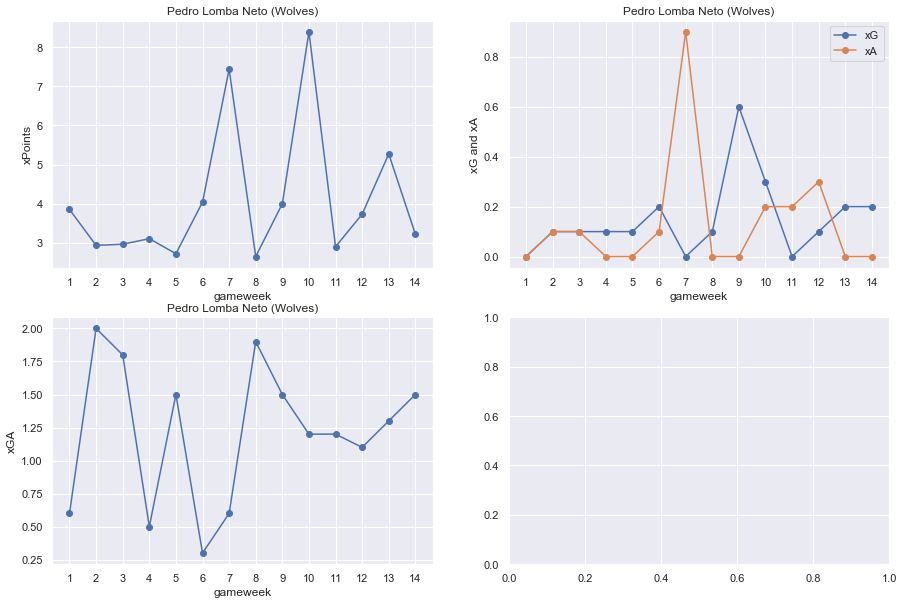

In [27]:
# find player index
name_string = 'Neto'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,1,0,71,100.0,100.0,3,176413,NaN,NaN,0,0,-3,3,64.0,194,121,NaN,NaN,0,3,3.4,3.9,6,Christian,3.4,4,1,36.6,160,83,False,87.6,253,107,422,NaN,2020-12-12T22:00:13.289919Z,82,0,0,NaN,0,NaN,176413.jpg,3.3,0,0,Pulisic,2.5,False,...,NaN,0.6,0.0,NaN,NaN,NaN,NaN,NaN,0.7,0.0,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,5.772532,0.7,1.0,1.3,1.0,0.0,0.0,NaN,NaN,NaN,1.3,0.0,NaN,NaN,3.206531,0.0,0.0,0.5,0.0,0.2,0.0,4.197101,3.782632,3.347641,3.320667,3.470283,0.42482,0.511842,1.216499,2.0,0.286957


In [16]:
my_starting11 = [12,232,77,277,254,302,37,141,506,202,388]
my_subs = [35,474,200,146]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,49,11.964286,5.6,4.580136,6.014256,4.551288,5.088549,4.450042,2.069095
232,Chilwell,Chelsea,62,11.000000,6.0,4.845811,4.406430,4.671560,4.880706,4.635652,1.946124
77,Lamptey,Brighton,48,10.937500,3.2,3.464101,3.214400,3.786841,3.371583,3.362996,1.581138
277,Cancelo,Manchester City,55,9.019608,5.1,4.870139,4.813500,5.374863,5.333030,4.803531,2.076634
254,Salah,Liverpool,125,12.967033,9.1,7.090722,6.620020,6.718664,9.247753,7.641299,2.005559
302,Fernandes,Manchester Utd,110,13.076923,7.8,6.656121,6.842947,7.384685,6.189628,6.461122,2.006896
37,Grealish,Aston Villa,78,11.944444,7.2,5.899432,5.754968,5.314499,6.153072,5.702501,2.112335
141,Zaha,Crystal Palace,75,12.000000,6.5,5.576567,4.911460,6.285027,4.944783,5.392197,2.036274
506,Wilson,Newcastle Utd,66,12.058824,6.8,5.986590,5.674135,5.458132,5.117058,5.876212,2.330277



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
474,Neto,Wolves,59,14.042553,4.7,4.014795,4.704208,4.437214,3.920666,4.053321,1.652865
200,Dallas,Leeds United,47,14.054054,3.7,2.612484,2.886924,2.913887,3.461109,2.904605,1.205049
146,Mitchell,Crystal Palace,40,6.000000,2.5,2.690595,NaN,2.958936,2.195204,2.566991,1.345298


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)